# Lab 2: Learning and convolutional neural networks
You will find the complete lab manual in this file. Some exercises require written answers, while others require coding.

**Important:** Do **not** define functions directly in this notebook. Instead, save them in the `functions.py` file and call them from the code cells in this notebook.

### Submission Requirements:
Your final lab submission should include:
1. Your edited **notebook file** (`.ipynb`).
2. Your **`functions.py`** file containing all function definitions.
3. A **HTML printout** of the executed notebook with all outputs visible: File → Save and export Notebook As → HTML

First, we'll import a set of python packages you'll need for this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob

import scipy.io

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/lab_2')

Mounted at /content/drive


## Task 1: Learning a Linear Classifier

In this part, we will try to learn a linear classifier for blood cell detection. Note that the classifier could also be viewed as a minimal neural network consisting of three parts: a scalar product node (or fully-connected node), a constant (or bias) term and a logistic sigmoid function. To find good parameters we will try to minimize the negative log-likelihood over a small training set.

The output from our classifier is a probability $p$ for the input patch being centered at a cell centre. The sigmoid function will make sure that $0\leq p \leq 1$. To be more precise the output is
\begin{equation}p = \frac{e^y}{1+e^y} \quad \text{where} \quad y=I\cdot \omega + \omega_0\end{equation}
Instead of testing a bunch of manually chosen $\omega$’s and $\omega_0$’s, we will try to learn good values for all the parameters. This requires training examples, that you find in `fg_patches.npy` and `bg_patches.npy`.

### Task 1.1
Load the data

In [5]:
fg_patches = np.load("data/fg_patches.npy")
bg_patches = np.load("data/bg_patches.npy")

It loads two numpy arrays, fg_patches and bg_patches, corresponding to positive (centered blood cells) and negative examples respectively.

### Task 1.2


Create two new variables, examples and labels. The variable `examples` should be an array containing all the patches (both positives and negatives) and `labels` should be an array with the same number of elements such that `labels[i] = 1` if `examples[i]` is a positive example, and `labels[i] = 0` otherwise.

In [6]:
# Your code here
example =[]
labels = []

for fg in fg_patches:
    example.append(fg)
    labels.append(1)

for bg in bg_patches:
    example.append(bg)
    labels.append(0)

example = np.array(example)
labels = np.array(labels)


### Task 1.3
Split the data into training, (`examples_train`, `labels_train`), and validation, (`examples_val`, `labels_val`). The two should have a similar structure to `examples` and `labels`. The splitting of the data into the two sets should be done in a random manner, for example using `np.random.permutation` to shuffle the indices. Write what percentage of data you use for training and validation respectively.

**Percentage of data used for training: 0.8**

**Percentage of data used for validation: 0.2**

In [7]:
# Your code here
train_percentage = 0.8
val_percentage = 0.2

num_samples = len(example)
indices = np.random.permutation(num_samples)

train_size = int(train_percentage * num_samples)
train_indices = indices[:train_size]
val_indices = indices[train_size:]

examples_train = example[train_indices]
labels_train = labels[train_indices]
examples_val = example[val_indices]
labels_val = labels[val_indices]

## Task 2: Training the Classifier
We will try to find parameters that minimize the negative log-likelihood on the training data. More precisely,
\begin{equation}
L(\theta) = \sum_{i\in S_+}-ln(p_i)+ \sum_{i\in S_-}-ln(1-p_i) = \sum_i L_i (\theta)
\end{equation}

where $p_i$ refers to the classifier output for the i'th training example. As in the lectures we will refer to the terms here as the partial loss $L_i$.

Before doing the next exercise, you need to work out how to compute the gradient of the partial loss $L_i$.

### Task 2.1
Make a function `partial_gradient` that computes the derivatives of the partial loss $L_i$ with respect to each of the classifier parameters. Place it in your `functions.py` file.

In [ ]:
# def partial_gradient(w, w0, example_train, label_train):
#     """
#     Computes the derivatives of the partial loss Li with respect to each of the classifier parameters.
#
#     Parameters:
#     - w: weight vector (same shape as example_train)
#     - w0: bias term (scalar)
#     - example_train: input image / example (same shape as w)
#     - label_train: 0 or 1 (negative or positive example)
#
#     Returns:
#     - wgrad: gradient with respect to w
#     - w0grad: gradient with respect to w0
#     """
#
#     # Write your code here
#
#     return wgrad, w0grad

### Task 2.2
At each iteration of stochastic gradient descent, a training example, $i$, is chosen at random. For this example the gradient of the partial loss, $L_i$, is computed and the parameters are updated according to this gradient. The most common way to introduce the randomness is to make a random reordering of the data and then going through it in the new order. One pass through the data is called an epoch.

Make a function `process_epoch` that performs one epoch of stochastic gradient descent, and place it in your `functions.py` file.

In [ ]:
# def process_epoch(w, w0, lrate, examples_train, labels_train, random_order=True):
#     """
#     Performs one epoch of stochastic gradient descent.
#
#     Parameters:
#     - w: weight array (same shape as examples)
#     - w0: bias term (scalar)
#     - lrate: learning rate (scalar)
#     - examples_train: list or array of training examples (e.g., shape (N, 35, 35))
#     - labels_train: array of labels (shape (N,))
#
#     Returns:
#     - Updated w and w0 after one epoch
#     """
#
#     # Write your code here
#
#     return w, w0

### Task 2.3
Initialize `w = s * randn(35,35)`, with `s = 0.01` and `w0 = 0`; and run 5 epochs on your training examples. Plot `w` after each epoch (or after each iteration if you are curious), to get a sense of what is happening. Also, try using different `s=[10,1,0.1,0.01]` and plot `w` after 5 epochs for each value of `s`. Include on the report visualizations of w for the different values of `s`, along with an written explanation of what is happening.

Visualizing weights for s = 0.01 at epoch 0


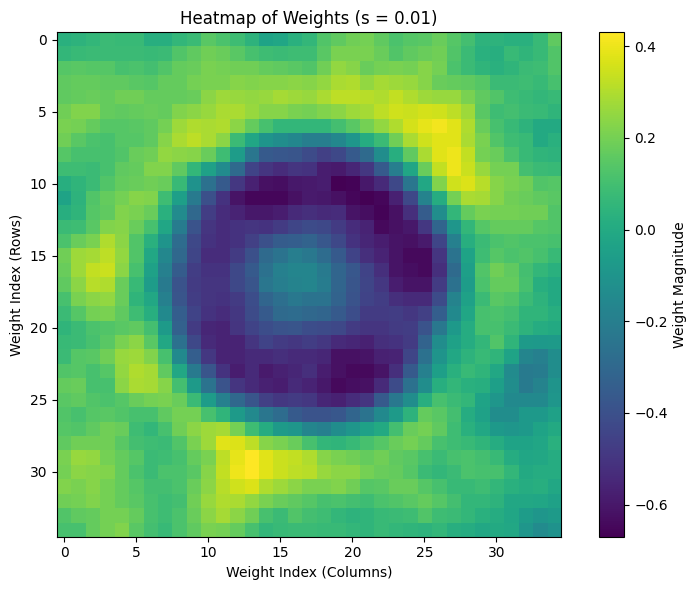

Visualizing weights for s = 0.01 at epoch 1


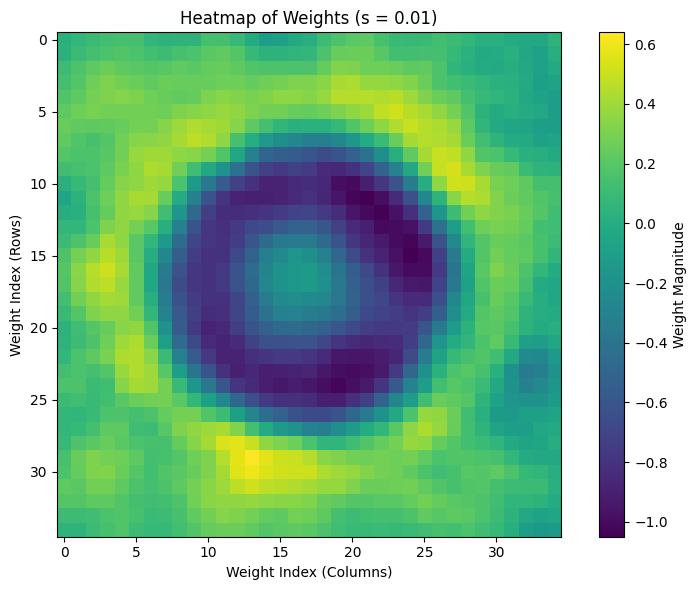

Visualizing weights for s = 0.01 at epoch 2


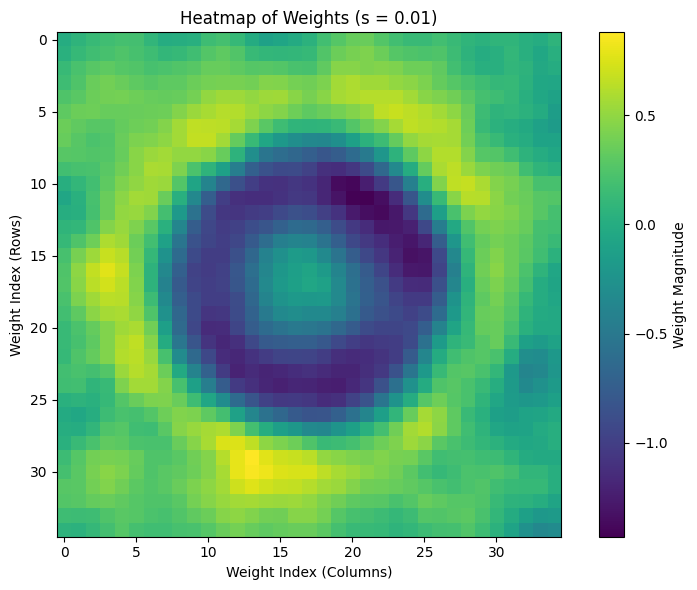

Visualizing weights for s = 0.01 at epoch 3


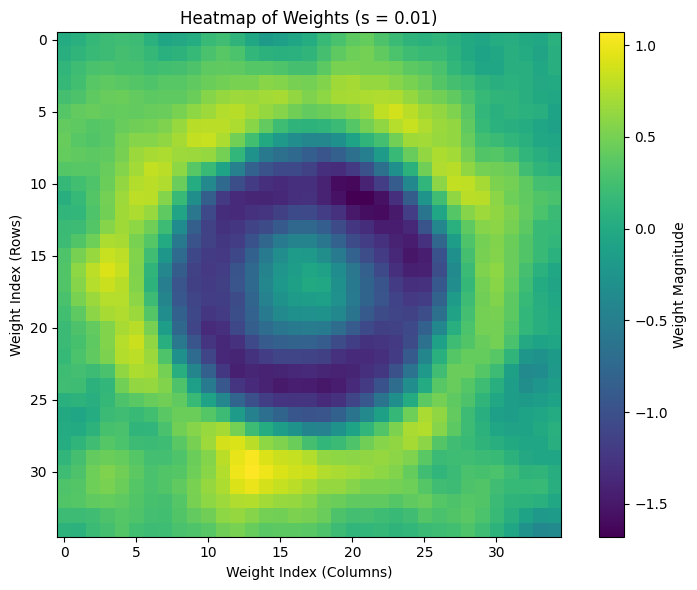

Visualizing weights for s = 0.01 at epoch 4


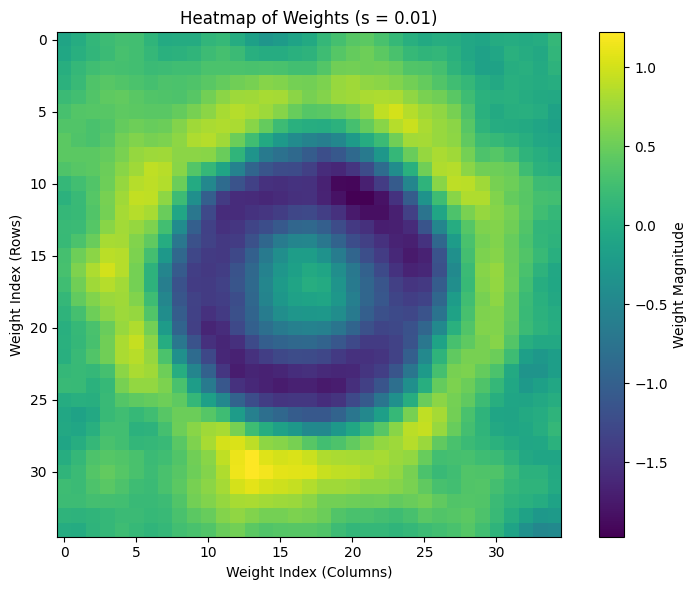

Visualizing weights for s = 10


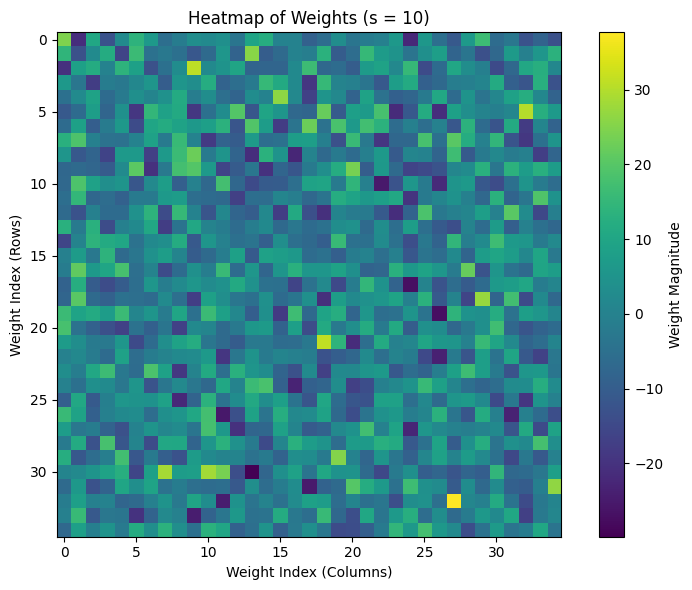

Visualizing weights for s = 1


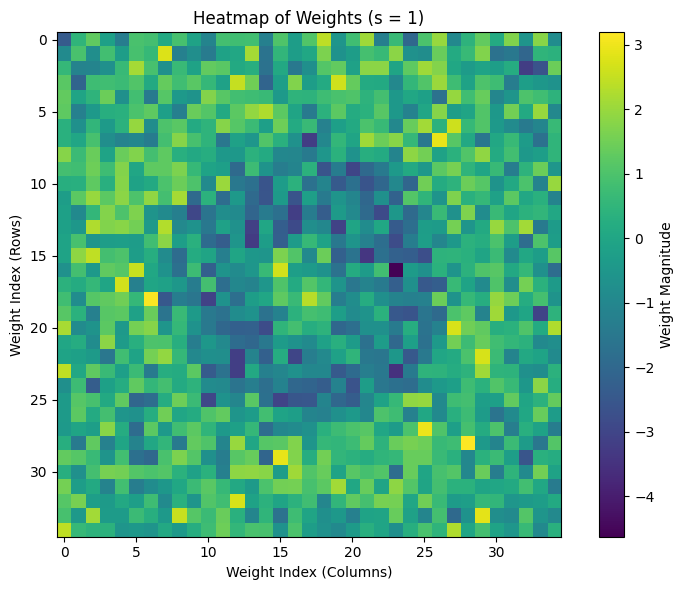

Visualizing weights for s = 0.1


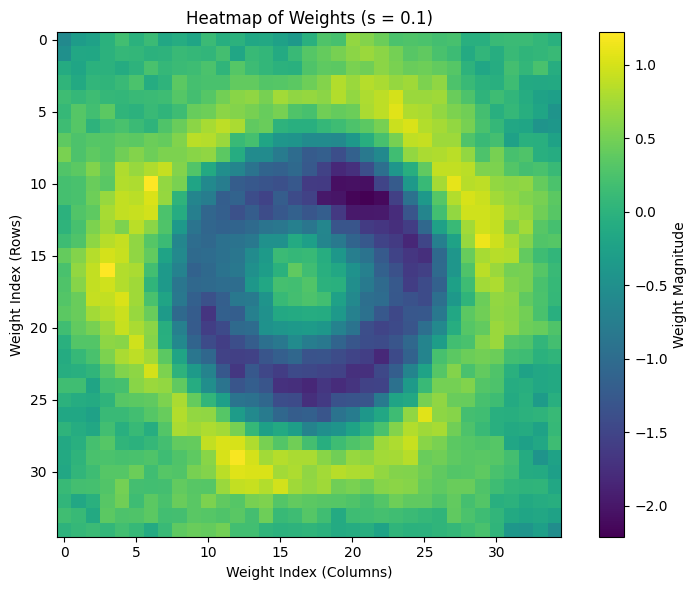

Visualizing weights for s = 0.01


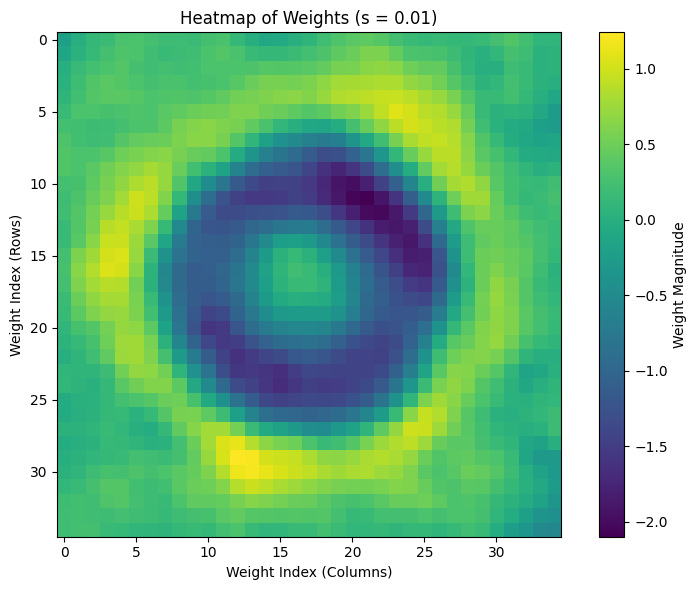

In [8]:
import importlib
import functions
importlib.reload(functions)
from functions import process_epoch
from functions import visualize_weights
import random
import numpy as np
# Your code here
s=0.01
learning_rate=0.1
w = 0.01*np.random.randn(35,35)
w0 = 0

for epoch in range(5):
    w, w0 = process_epoch(w, w0, learning_rate, examples_train, labels_train)

    print(f"Visualizing weights for s = 0.01 at epoch {epoch}")
    visualize_weights(w, 0.01)



s=[10,1,0.1,0.01]
learning_rate=0.1
w = 0.01*np.random.randn(35,35)
w0 = 0
for sv in s:
    w = sv * np.random.randn(35, 35)
    for epoch in range(5):
        w, w0 = process_epoch(w, w0, learning_rate, examples_train, labels_train)

    print(f"Visualizing weights for s = {sv}")
    visualize_weights(w, sv)


**Your answer:

When \( s = 0.01 \), the heatmap of the weight matrix \( w \) exhibits distinct concentric circles. These patterns become increasingly pronounced as the number of epochs increases, resulting in higher contrast and clearer definition. This indicates that the model is progressively refining its learned features, enhancing the clarity and focus of the patterns.

For larger values of \( s \), such as \( s = 10 \) or \( s = 1 \), the heatmaps appear more stochastic and lack the distinct concentric circles observed with smaller \( s \). This increased randomness is due to the larger initial weight magnitudes, which can obscure subtle data patterns and lead to less structured learning. The initial large weights may overshadow the nuanced features of the data, resulting in a more chaotic convergence process.
**

### Task 2.4
As said before, at each iteration of stochastic gradient descent, a training example is chosen at random. Check what happens to $w$ after 5 epochs when that training example is not chosen randomly but in sequence, i.e. first $i = 1$, then $i = 2$, and so on. Include in the report a visualization of $w$ for this case. (Don’t forget to change back your function to a random choice of $i$ after this exercise).


w for s = 10 is


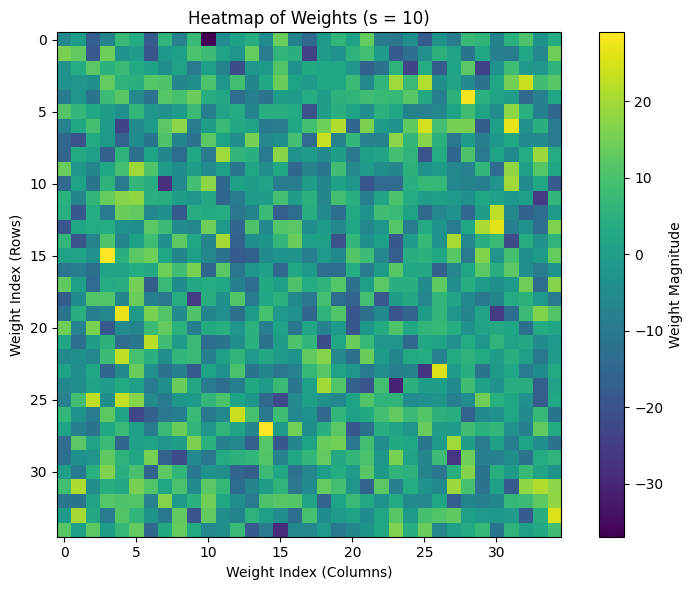

w for s = 1 is


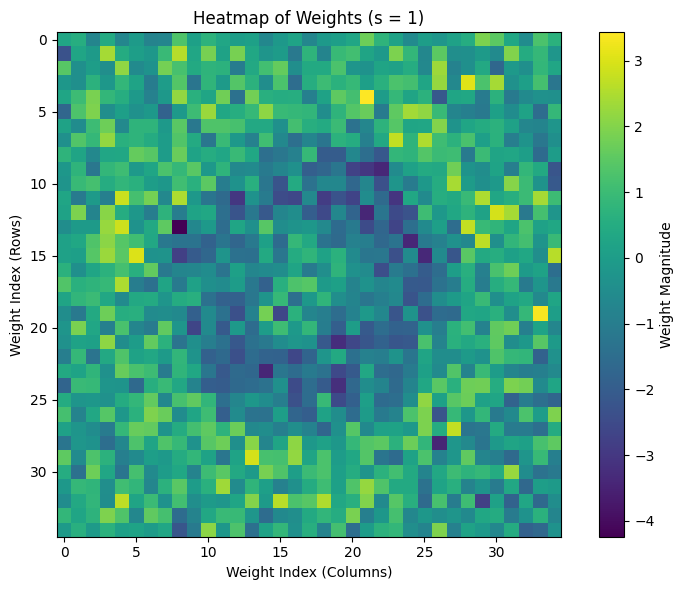

w for s = 0.1 is


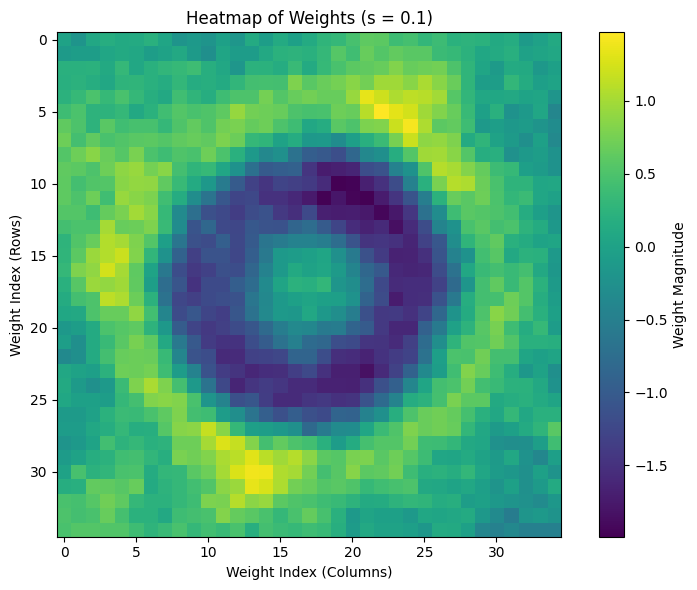

w for s = 0.01 is


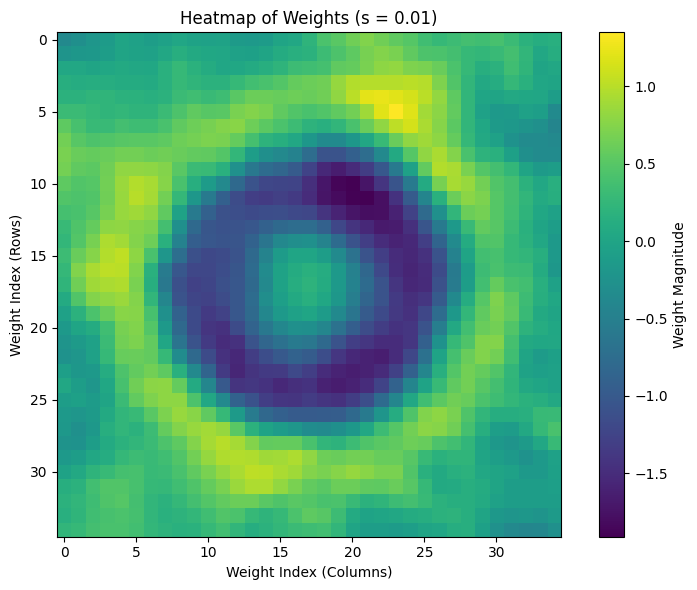

In [9]:
# Your code here
s=[10,1,0.1,0.01]
learning_rate=0.1
w = 0.01*np.random.randn(35,35)
w0 = 0
for sv in s:
    w = sv*np.random.randn(35,35)
    for epoch in range(5):
        w,w0 = process_epoch(w,w0,learning_rate,examples_train,labels_train,random_order=False)
    print(f"w for s = {sv} is")
    visualize_weights(w,sv)
    np.set_printoptions(threshold=np.inf, linewidth=np.inf)



### Task 2.5
Make a function `classify` that applies the classifier to the example data. After that, use it on `examples_train` and `examples_val` and check how much accuracy it gets for each by comparing the predicted labels with `labels_train` and `labels_val` respectively. Write on your report the highest accuracy you were able to achieve in the training and validation data. Hint: train the classifier for longer than 5 epochs to make sure that it converges.

In [ ]:
# def classify(examples_val, w, w0):
#     """
#     Applies a classifier to the example data.
#
#     Parameters:
#     - examples_val: List of validation examples (each example is a 1D array)
#     - w: weight array (same shape as each example in examples_val)
#     - w0: bias term (scalar)
#
#     Returns:
#     - predicted_labels: Array of predicted labels (0 or 1) for each example
#     """
#
#     # Write your code here
#     batch_size, height, width = examples_val.shape
#     examples_val_flatten = examples_val.reshape(batch_size,-1)
#     pred = np.dot(w.flatten(), examples_val_flatten)+w0
#     prob = np.exp(pred)/(1+np.exp(pred))
#     predicted_labels = 1 if prob > 0.5 else 0
#     return predicted_labels


When you have defined the function run the following code.

In [10]:
import importlib
import functions
importlib.reload(functions)
from functions import classify
s=[10,1,0.1,0.01]
learning_rate=0.1
w = 0.1*np.random.randn(35,35)
w0 = 0
for epoch in range(300):
    w,w0 = process_epoch(w,w0,learning_rate,examples_train,labels_train,random_order=True)
predicted_labels = classify(examples_train,w,w0)
correct = sum(predicted_labels==labels_train)
accuracy = 100*correct/len(labels_train)
print(f"Training Accuracy: {accuracy}")
predicted_labels = classify(examples_val,w,w0)
correct = sum(predicted_labels==labels_val)
accuracy = 100*correct/len(labels_val)
print(f"Validation Accuracy: {accuracy}")


Training Accuracy: 100.0
Validation Accuracy: 91.25


**Write the highest accuracy you were able to get here: Training Accuracy: 100 and
Validation Accuracy: 91.25**


### Task 2.6
The data for training this classifier consists of only 400 examples (less if you consider that you have split it into training and validation). To achieve higher accuracy it might be useful to perform some data augmentation before the training. In this exercise you will increase the number of elements in the training examples by $M$ times. Make a function `augment_data` that takes each sample of the original training data and applies M random rotations (you can use function `scipy.ndimage.rotate`), resulting in $M$ new examples. Store these new examples in `examples_train_aug` and their corresponding labels in `labels_train_aug`.

In [11]:
# def augment_data(examples_train, labels_train, M):
#     """
#     Data augmentation: Takes each sample of the original training data and
#     applies M random rotations, which result in M new examples.
#
#     Parameters:
#     - examples_train: List of training examples (each example is a 2D array)
#     - labels_train: Array of labels corresponding to the examples
#     - M: Number of random rotations to apply to each training example
#
#     Returns:
#     - examples_train_aug: Augmented examples after rotations
#     - labels_train_aug: Corresponding labels for augmented examples
#     """
#     # Write your code here
#
#     return examples_train_aug, labels_train_aug

Train the classifier with this augmented data and write on your report the new values for accuracy on the training and validation examples.

In [12]:
# Your code here
import importlib
import functions
importlib.reload(functions)
from functions import augment_data
s=[10,1,0.1,0.01]
learning_rate=0.001
w = 0.1*np.random.randn(35,35)
w0 = 0
examples_train_au, labels_train_au = augment_data(examples_train,labels_train,M=5)
for epoch in range(150):
    w,w0 = process_epoch(w,w0,learning_rate,examples_train_au,labels_train_au,random_order=True)


In [13]:
from functions import classify
predicted_labels = classify(examples_train_au,w,w0)
correct = sum(predicted_labels==labels_train_au)
accuracy = 100*correct/len(labels_train_au)
print(f"Training Accuracy with augmentation: {accuracy}")
predicted_labels = classify(examples_val,w,w0)
correct = sum(predicted_labels==labels_val)
accuracy = 100*correct/len(labels_val)
print(f"Validation Accuracy with augmentation: {accuracy}")

Training Accuracy with augmentation: 95.6875
Validation Accuracy with augmentation: 93.75


**Write the highest accuracy you were able to get here:
Training Accuracy with augmentation: 95.6875
Validation Accuracy with augmentation: 93.75
**

## Task 3: Convolutional neural networks
In the last part, your task is to train a convolutional neural networks using the python package pytorch.



### Task 3.1
Run the following cell to load MNIST, a dataset of images of digits. Plot a few of them to see what the data looks like.

54000 images for training  and 6000 images for validation
Batch of images: torch.Size([64, 1, 28, 28])
Batch of labels: torch.Size([64])


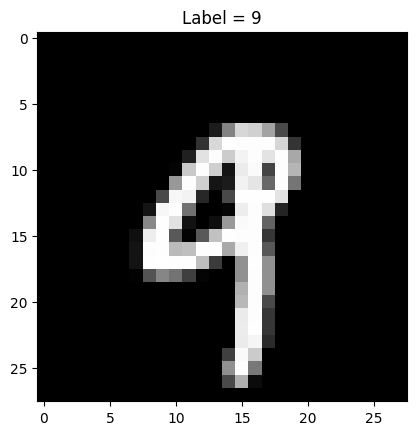

In [14]:
from supplied import load_mnist_training_validation
percentage_validation=0.1 # Define percentage of images to use for validation
batch_size = 64 # Define batch size
train_loader, val_loader = load_mnist_training_validation(percentage_validation,batch_size)


# Example: Load one batch from the dataloader
img_idx = 0 # Can try any index between 0 and (batch_size-1)
for images, labels in train_loader:
    print(f"Batch of images: {images.shape}")
    print(f"Batch of labels: {labels.shape}")
    image = images[img_idx,0,:,:]
    label = labels[img_idx]
    plt.imshow(image,cmap="gray")
    plt.title(f"Label = {label}")
    break  # Just to show one batch

### Task 3.2
The next step is to define a network for classification. You should define a pytorch model that implements the following network:

![title](img/simple_cnn.png)

As a hint here is an example of how a simple pytorch network can be defined:

```
class simple_feedforward_network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(simple_feedforward_network, self).__init__()
        # Defining the layers needed for the network
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.relu = nn.ReLU()  # ReLU activation
        self.fc2 = nn.Linear(hidden_size, output_size)  # Output layer
    
    def forward(self, x):
        # Defining the forward pass
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
```

Apart from the layers used in the example above the functions `nn.Conv2d`, `nn.MaxPool2d` and `F.softmax` will be useful. Note that you have to set the stride for max pooling to 2 to get the expected downsampling.

You should fill in this template to design the asked for network.

In [15]:
class basic_cnn_classifier(nn.Module):
    def __init__(self):
        super(basic_cnn_classifier, self).__init__()

        # Your code here
        # Define the layers needed for your network
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=25, kernel_size=3, stride=1)
        self.relu = nn.ReLU()
        self.MaxPool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=13*13*25, out_features=10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Your code here
        # Define the forward pass through the network
        x = self.conv1(x)
        x = self.relu(x)
        x = self.MaxPool(x)
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        x = self.fc1(x)
        x = self.softmax(x)
        return x  # Output class propabilities

### Task 3.3
You should now train the network using the following training loop defined in `train_model`.

In [16]:
from supplied import train_model

# Set device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Training loop
num_epochs = 5
lr = 0.01

# Initialize model, loss function, and optimizer
basic_model = basic_cnn_classifier().to(device)
loss_fn = nn.NLLLoss ()  # Define the loss function
optimizer = optim.SGD(basic_model.parameters(), lr=lr)

basic_model_trained = train_model(basic_model, train_loader, val_loader, num_epochs, optimizer,loss_fn,device)

Epoch [1/5], Loss: -0.6514, Accuracy: 72.85%
Validation Accuracy: 83.03%
Epoch [2/5], Loss: -0.8522, Accuracy: 88.24%
Validation Accuracy: 90.43%
Epoch [3/5], Loss: -0.8905, Accuracy: 91.23%
Validation Accuracy: 91.27%
Epoch [4/5], Loss: -0.9016, Accuracy: 91.96%
Validation Accuracy: 91.88%
Epoch [5/5], Loss: -0.9089, Accuracy: 92.37%
Validation Accuracy: 92.28%
Training complete.


### Task 3.4
Work out how many trainable parameters your network contains. Note that the convolution layer does not use padding so the output from the convolution layer is smaller than the input.

**Write your answer here: Bias included**
#### 1. Convolution Layer (`Conv2d`)
  \[
  25 * 3 * 3 + 25 = 250
  \]

#### 2. Fully Connected Layer (`Linear`)
  \[
  13 * 13 * 25 * 10 + 10 = 42260
  \]

#### 3. Total Parameters
  \[
  250 + 42260 = 42510
  \]


### Task 3.5
To run a convolutional neural network we have to perform a massive amount of computations. Hence it is very important to consider the computational load when designing a network. For the network below, compare (roughly) the time consumption (number of computations required) for the blue and the red layers. You can ignore effects of padding. NOTE: You are not supposed to actually implement and train this network.


![title](img/blue_red_cnn.png)

**Write your answer here:** <br>
Blue Layer:<br>
(28−5+1)×(28−5+1)×10×5×5×10 = 1,440,000<br>
Red Layer:<br>
1×1×10×20 = 200


...

 ### Task 3.6

Imagine that the blue box of the network in the figure above is replaced by a sequence of two layers of 10 3 × 3 convolutional filters. What changes in terms of network parameters, time consumption (number of computations) and accuracy would that lead to?


**Write your answer here:** <br>
Number of parameters before change in blue box: 10 * 10 * 5 * 5 + 10 = 2510<br>
Number of parameters after change in blue box: (10 * 10 * 3 * 3 + 10) * 2 = 1820<br>
Decrease (Bias included)<br>
<hr>
Number of computation after change in blue box: 10 * 10 * 5 * 5 * 20 = 50,000<br>
Number of computation after change in blue box: (10 * 10 * 3 * 3) * 22 + (10 * 10 * 3 * 3) * 20 = 37,800<br>
Decrease<br>
<hr>
Accuracy: Likely to increase due to the use of smaller filters, which can capture more detailed spatial features. However, the exact change depends on the specific task and dataset


### Task 3.7
Make a copy of `basic_cnn_classifier` and name it `better_cnn_classifier`. Try modifying the network by adding more layers. Also experiment with the training options. How much can you improve the results?

In [17]:
class better_cnn_classifier(nn.Module):
    def __init__(self):
        super(better_cnn_classifier, self).__init__()

        # Your code here
        # Define the layers needed for your network
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=25, kernel_size=3, stride=1)

        self.relu = nn.ReLU()
        self.MaxPool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=5*5*25, out_features=10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Your code here
        # Define the forward pass through the network
        x = self.conv1(x)
        x = self.relu(x)
        x = self.MaxPool(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.MaxPool(x)

        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        x = self.fc1(x)
        x = self.softmax(x)

        return x # Output class propabilities

In [30]:
from supplied import train_model

# Set device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Training loop
num_epochs = 30
lr = 0.05


# Initialize model, loss function, and optimizer
better_model = better_cnn_classifier().to(device)
loss_fn = nn.NLLLoss ()  # Define the loss function
optimizer = optim.SGD(better_model.parameters(), lr=lr)

better_model_trained = train_model(better_model, train_loader, val_loader, num_epochs, optimizer,loss_fn,device)

Epoch [1/30], Loss: -0.6058, Accuracy: 63.18%
Validation Accuracy: 76.50%
Epoch [2/30], Loss: -0.8160, Accuracy: 82.31%
Validation Accuracy: 87.38%
Epoch [3/30], Loss: -0.8720, Accuracy: 87.65%
Validation Accuracy: 88.27%
Epoch [4/30], Loss: -0.8786, Accuracy: 88.21%
Validation Accuracy: 88.80%
Epoch [5/30], Loss: -0.8823, Accuracy: 88.52%
Validation Accuracy: 89.08%
Epoch [6/30], Loss: -0.8851, Accuracy: 88.74%
Validation Accuracy: 89.18%
Epoch [7/30], Loss: -0.8873, Accuracy: 88.96%
Validation Accuracy: 89.30%
Epoch [8/30], Loss: -0.9026, Accuracy: 90.49%
Validation Accuracy: 96.82%
Epoch [9/30], Loss: -0.9736, Accuracy: 97.65%
Validation Accuracy: 97.55%
Epoch [10/30], Loss: -0.9769, Accuracy: 97.92%
Validation Accuracy: 98.02%
Epoch [11/30], Loss: -0.9783, Accuracy: 98.03%
Validation Accuracy: 97.97%
Epoch [12/30], Loss: -0.9798, Accuracy: 98.14%
Validation Accuracy: 97.98%
Epoch [13/30], Loss: -0.9808, Accuracy: 98.26%
Validation Accuracy: 97.98%
Epoch [14/30], Loss: -0.9819, Accu

### Task 3.8
You should now take your model that gave best results on the validation set and evaluate it on the test set. Compute precision and recall for each of the 10 classes. The definitions of precision and recall can be found in the lecture notes chapter 4.

In [31]:
from supplied import load_mnist_test
import torch
from sklearn.metrics import precision_score, recall_score
test_loader = load_mnist_test() # Loading dataloader for test split

# Initialize variables
all_targets = []
all_predictions = []

# Disable gradient calculation for evaluation
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = better_model_trained(inputs)
        _, predicted = torch.max(outputs, 1)

        all_targets.extend(targets.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays
all_targets = np.array(all_targets)
all_predictions = np.array(all_predictions)

# Compute precision and recall for each class (0–9)
precision = precision_score(all_targets, all_predictions, average=None)
recall = recall_score(all_targets, all_predictions, average=None)

# Print results for each class
for i in range(10):
    print(f"Class {i}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}")




# Your code here

Class 0: Precision = 0.98, Recall = 1.00
Class 1: Precision = 0.99, Recall = 1.00
Class 2: Precision = 0.99, Recall = 0.98
Class 3: Precision = 0.99, Recall = 0.99
Class 4: Precision = 0.99, Recall = 0.99
Class 5: Precision = 0.99, Recall = 0.98
Class 6: Precision = 1.00, Recall = 0.99
Class 7: Precision = 0.98, Recall = 0.98
Class 8: Precision = 0.99, Recall = 0.98
Class 9: Precision = 0.98, Recall = 0.98


### Task 3.9
Show three cases where your model fails with names indicating what digit they were mistaken for. You can use `plt.imshow` show the images here. Have a look at the images before submitting it, so it looks right.

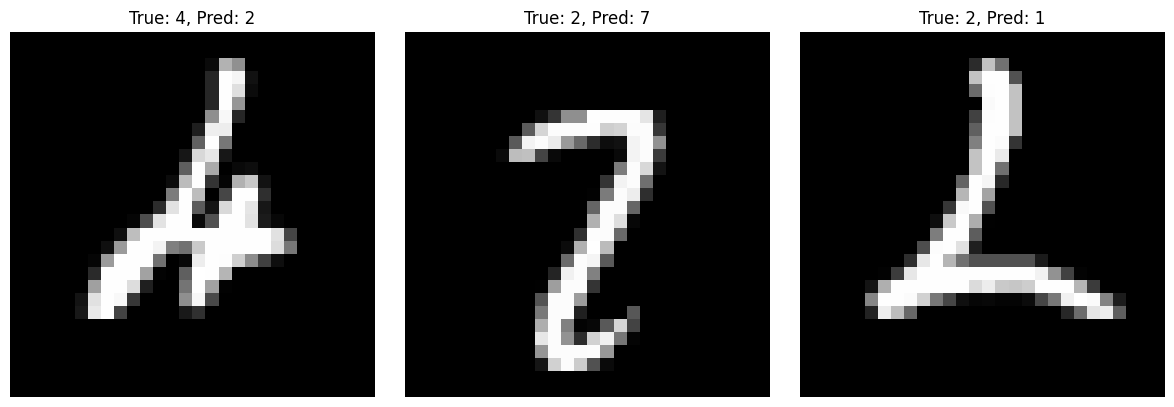

In [32]:
# Your code here
import torch
import matplotlib.pyplot as plt

# Load the test data
test_loader = load_mnist_test()


failed_cases = []  # To store failed cases (image, true label, predicted label)

# Disable gradient calculation for evaluation
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = better_model_trained(inputs)
        _, predicted = torch.max(outputs, 1)

        # Find cases where predictions are incorrect
        for i in range(len(targets)):
            if predicted[i] != targets[i]:
                failed_cases.append((inputs[i].cpu(), targets[i].item(), predicted[i].item()))

                # Stop after collecting 3 failed cases
                if len(failed_cases) >= 3:
                    break
        if len(failed_cases) >= 3:
            break

# Plot the failed cases
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, (img, true_label, predicted_label) in enumerate(failed_cases):
    axes[i].imshow(img.squeeze(), cmap="gray")
    axes[i].set_title(f"True: {true_label}, Pred: {predicted_label}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()